In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [87]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utide import solve
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [88]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [60]:
def compare_fit(df_1, df_2, temp, pres, loc):
    
    temp = if_masked_to_array(temp[loc])
    pres = if_masked_to_array(pres[loc])
    zz = np.linspace(0, pres[-1] + 5, 300)    
    
    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(temp, pres, marker='o', fc='None', ec='tab:red', s=22)
    ax.axhline(df_1.iloc[loc, 3], c='grey', ls='--', label='MLD ref') # plot MLD
    ax.axhline(df_2.iloc[loc, 3], c='grey', ls=':', label='MLD ref new tol') # plot MLD
    ax.set_ylim(pres[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.plot(fit_function(zz, df_1, loc), zz, ls='--', label='ref')
    ax.plot(fit_function(zz, df_2, loc), zz, label='ref new tol')
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    ax.set_title(df_1['Dates'].iloc[loc])
    ax.legend()
    fig.tight_layout()
    plt.show()

def distance(df_fit, variable, n, value):
    '''Given variable of df_fit, return the locs where the diference between
    slices [n:] - [:-n] in that variable are greater than value.
    '''
    array = df_fit[variable].to_numpy()
    locs = np.where(abs(array[n:] - array[:-n]) > value)[0]
    ratio = len(locs)/len(df_fit)
    return locs, ratio
                    
def n_worst_profiles(df_fit, n):
    em = df_fit['em'].to_numpy()
    indices = np.argpartition(em, -n)[-n:]
    return indices

In [109]:
df_first = load_SHDR_fit('SHDR_trials/test_winter_c_61_71.csv')
temp, depth, date = load_time_series('test/test_winter.nc')

temp = temp[:200]
pres = depth[:200]
date = depth[:200]

In [106]:
print(distance(df_first, 'D1', 1, 10)[1])

0.0


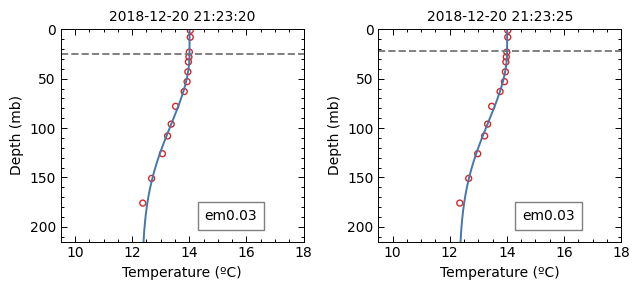

In [111]:
plot_multiple_profiles(df_first, temp, pres, [0, 1])

In [100]:
df_first

,date,lat,lon,D1,b2,c2,b3,a2,a1,a3,em,Dates
0,1545341000,43.789,3.782,38.730201,0.002836,0.000046,-0.002972,1.6625,14.002975,12.340475,0.038442,2018-12-20 21:23:20
1,1545341005,43.789,3.782,39.575796,0.004061,0.000039,-0.002972,1.6794,14.001415,12.322015,0.038078,2018-12-20 21:23:25
2,1545341010,43.789,3.782,38.578892,0.002800,0.000047,-0.002972,1.6672,14.004138,12.336938,0.038408,2018-12-20 21:23:30
3,1545341015,43.789,3.782,38.750026,0.002877,0.000046,-0.002972,1.6623,14.001997,12.339697,0.038275,2018-12-20 21:23:35
4,1545341020,43.789,3.782,39.495944,0.003861,0.000040,-0.002972,1.6727,14.001514,12.328814,0.037879,2018-12-20 21:23:40
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1545341975,43.789,3.782,39.169224,0.003093,0.000047,-0.002972,1.6440,14.004458,12.360458,0.030694,2018-12-20 21:39:35
196,1545341980,43.789,3.782,38.955666,0.003092,0.000046,-0.002972,1.6790,14.002924,12.323924,0.030770,2018-12-20 21:39:40
197,1545341985,43.789,3.782,37.694217,0.003085,0.000044,-0.002972,1.6941,14.004021,12.309921,0.029147,2018-12-20 21:39:45
198,1545341990,43.789,3.782,39.009793,0.002786,0.000049,-0.002972,1.6486,14.006560,12.357960,0.031965,2018-12-20 21:39:50


In [104]:
df_first

,date,lat,lon,D1,b2,c2,b3,a2,a1,a3,em,Dates
0,1545341000,43.789,3.782,38.315293,0.002755,0.000050,-0.002707,1.6625,14.002804,12.340304,0.039064,2018-12-20 21:23:20
1,1545341005,43.789,3.782,39.324779,0.004023,0.000042,-0.002707,1.6794,14.001232,12.321832,0.038683,2018-12-20 21:23:25
2,1545341010,43.789,3.782,38.152739,0.002717,0.000050,-0.002707,1.6672,14.003965,12.336765,0.039050,2018-12-20 21:23:30
3,1545341015,43.789,3.782,38.343344,0.002799,0.000050,-0.002707,1.6623,14.001822,12.339522,0.038915,2018-12-20 21:23:35
4,1545341020,43.789,3.782,39.226186,0.003818,0.000044,-0.002707,1.6727,14.001330,12.328630,0.038496,2018-12-20 21:23:40
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1545341975,43.789,3.782,38.744401,0.002993,0.000051,-0.002707,1.6440,14.004338,12.360338,0.031021,2018-12-20 21:39:35
196,1545341980,43.789,3.782,38.550087,0.003004,0.000050,-0.002707,1.6790,14.002780,12.323780,0.031298,2018-12-20 21:39:40
197,1545341985,43.789,3.782,37.257467,0.002996,0.000048,-0.002707,1.6941,14.003869,12.309769,0.029813,2018-12-20 21:39:45
198,1545341990,43.789,3.782,38.526871,0.002671,0.000053,-0.002707,1.6486,14.006448,12.357848,0.032239,2018-12-20 21:39:50


In [110]:
df_first

,date,lat,lon,D1,b2,c2,b3,a2,a1,a3,em,Dates
0,1545341000,43.789,3.782,24.735251,3.243865e-11,0.000096,0.0,1.6625,14.008024,12.345524,0.032564,2018-12-20 21:23:20
1,1545341005,43.789,3.782,21.625308,1.192412e-10,0.000095,0.0,1.6794,14.011447,12.332047,0.032727,2018-12-20 21:23:25
2,1545341010,43.789,3.782,24.835687,8.588920e-11,0.000096,0.0,1.6672,14.008569,12.341369,0.032372,2018-12-20 21:23:30
3,1545341015,43.789,3.782,24.579727,0.000000e+00,0.000096,0.0,1.6623,14.007204,12.344904,0.032518,2018-12-20 21:23:35
4,1545341020,43.789,3.782,22.298392,3.375392e-11,0.000096,0.0,1.6727,14.010246,12.337546,0.032366,2018-12-20 21:23:40
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1545341975,43.789,3.782,25.761296,5.314035e-11,0.000101,0.0,1.6440,14.007681,12.363681,0.027883,2018-12-20 21:39:35
196,1545341980,43.789,3.782,24.959250,3.460745e-11,0.000099,0.0,1.6790,14.007216,12.328216,0.027948,2018-12-20 21:39:40
197,1545341985,43.789,3.782,22.268778,0.000000e+00,0.000093,0.0,1.6941,14.011404,12.317304,0.027423,2018-12-20 21:39:45
198,1545341990,43.789,3.782,26.722534,1.680025e-16,0.000102,0.0,1.6486,14.008706,12.360106,0.028904,2018-12-20 21:39:50
